COMS21202: SPS, CW2

Initially, import the libraries needed.

In [12]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import axes3d, Axes3D
%matplotlib inline

Taking a grayscale image, generate a colourmap for it.
Apply quantization to the image, done by representing a continuous function via a discrete one with quantization levels.

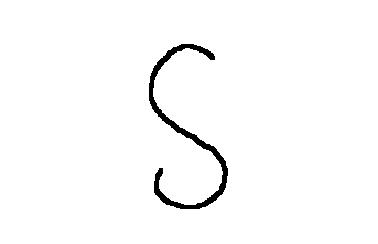

In [13]:
def gray2ind(img, levels=64):
  # this function assumes that the input image is grayscale with 256 colour levels
  if img.dtype != np.uint8 or len(img.shape) != 2:
    print( "Expected grayscale (2 dimensional) image of type uint8, got %d dimensional image of type %s." % (len(img.shape), str(img.dtype)) )
    raise

  # cast the image to double and scale to given level
  a = img/255
  a = a*(levels-1)
  a = a.round()
  a = np.uint8(a)

  # generate colourmap
  cm = np.repeat(np.linspace(0, 1, levels), 3).reshape((levels,3))

  return a, cm

def ind2plot(img, cmap):
  levels = cmap.shape[0]
  img_dsp = np.uint8(((img+1)*(256/levels))-1)

  fig = plt.figure()
  ax  = fig.add_subplot( 111 )
  ax.axis('off')
  ax.imshow( img_dsp, cmap='gray' ) # io.
  plt.show()

F = io.imread('S1.GIF')
X, Xmap = gray2ind(F, 6) # 2, 6, or 16
ind2plot(X, Xmap)

Fast Fourier Transform code, used to apply frequency decomposition.

In [14]:
def fft2(name):
    f = io.imread(name)   # read in image
    f_f = np.array(f, dtype=float)
    z = np.fft.fft2(f_f)           # do fourier transform
    q = np.fft.fftshift(z)         # puts u=0,v=0 in the centre
    Magq =  np.absolute(q)         # magnitude spectrum
    Phaseq = np.angle(q)           # phase spectrum
    return q

def showffts(ffts):
    fig1 = plt.figure()
    for idx, q in enumerate(ffts):
        ax1  = fig1.add_subplot( np.floor(len(ffts)/2),5,(idx + 1) )
        ax1.axis('off')
        # Usually for viewing purposes:
        ax1.imshow( np.log( np.absolute(q) + 1 ), cmap='gray' ) # io.
    
    fig2 = plt.figure()
    for idx, q in enumerate(ffts):
        w = np.fft.ifft2( np.fft.ifftshift(q) ) # do inverse fourier transform
        #
        ax2  = fig2.add_subplot( np.floor(len(ffts)/2),5,(idx + 1) )
        ax2.axis('off')
        ax2.imshow( np.array(w,dtype=int), cmap='gray' ) # io.

    plt.show()

In [15]:
Ss = [fft2('S1.GIF'),
      fft2('S2.GIF'),
      fft2('S3.GIF'),
      fft2('S4.GIF'),
      fft2('S5.GIF'),
      fft2('S6.GIF'),
      fft2('S7.GIF'),
      fft2('S8.GIF'),
      fft2('S9.GIF'),
      fft2('S10.GIF')]

Ts = [fft2('T1.GIF'),
      fft2('T2.GIF'),
      fft2('T3.GIF'),
      fft2('T4.GIF'),
      fft2('T5.GIF'),
      fft2('T6.GIF'),
      fft2('T7.GIF'),
      fft2('T8.GIF'),
      fft2('T9.GIF'),
      fft2('T10.GIF')]

Vs = [fft2('V1.GIF'),
      fft2('V2.GIF'),
      fft2('V3.GIF'),
      fft2('V4.GIF'),
      fft2('V5.GIF'),
      fft2('V6.GIF'),
      fft2('V7.GIF'),
      fft2('V8.GIF'),
      fft2('V9.GIF'),
      fft2('V10.GIF')]

Tests = [fft2('test_s1.gif'),
        fft2('test_s2.gif'),
        fft2('test_s3.gif'),
        fft2('test_s4.gif'),
        fft2('test_s5.gif'),
        fft2('test_t1.gif'),
        fft2('test_t2.gif'),
        fft2('test_t3.gif'),
        fft2('test_t4.gif'),
        fft2('test_t5.gif'),
        fft2('test_v1.gif'),
        fft2('test_v2.gif'),
        fft2('test_v3.gif'),
        fft2('test_v4.gif'),
        fft2('test_v5.gif')]

/home/baron/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


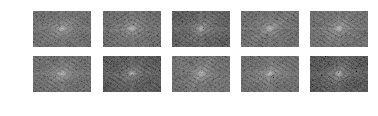

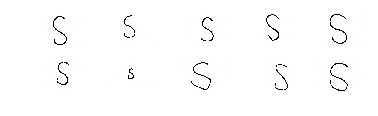

In [16]:
showffts(Ss)

/home/baron/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


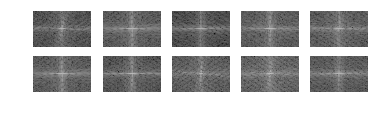

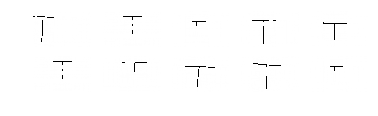

In [17]:
showffts(Ts)

/home/baron/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


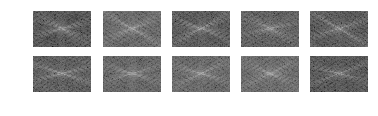

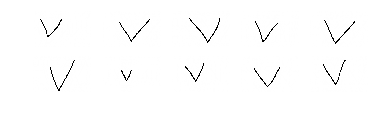

In [18]:
showffts(Vs)

/home/baron/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: ComplexWarning: Casting complex values to real discards the imaginary part


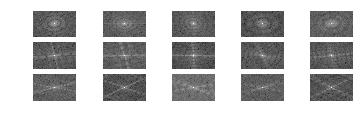

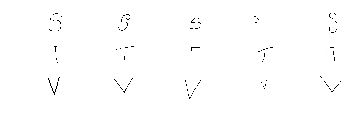

In [19]:
showffts(Tests)

Define functions for calculating the power spectrum in rings and sectors respectively.

In [55]:
def RingPower (points, ra, rb):
    
#     fig = plt.figure()

#     ax = fig.add_subplot(111)
#     ax.set_xlim([0, 640])
#     ax.set_ylim([0,400])
    
    power = 0
    
    origY = (len(points)/2)
    origX = (len(points[0])/2)
    
    for y, row in enumerate(points):
        
        for x, element in enumerate(row):
            
            v = y - origY
            u = x - origX
            
            if u**2 + v**2 <= rb**2 and ra**2 <= u**2 + v**2:
                
                power += np.log(np.absolute(element) + 1)**2
#                 ax.scatter([x], [y], color='r')
                
    
#     plt.show()
    
    return power
    
def SectorPower (points, r1, r2, O1, O2):
    
#     fig = plt.figure()

#     ax = fig.add_subplot(111)
#     ax.set_xlim([0, 640])
#     ax.set_ylim([0,400])
    
    power = 0
    
    origY = (len(points)/2)
    origX = (len(points[0])/2)
    
    for y, row in enumerate(points):
        
        for x, element in enumerate(row):
            
            v = y - origY
            u = x - origX
            
            if u != 0:
                if r1**2 <= u**2+ v**2 and u**2 + v**2 <= r2**2 and O1 <= np.arctan(np.absolute(v/u)) and np.arctan(np.absolute(v/u)) <= O2:
                    
                    power += np.log(np.absolute(element) + 1)**2
#                     ax.scatter([x], [y], color='r')
                    
#     plt.show()
                
    return power
    

In [64]:
def SPower (points):
    return RingPower(points, 50, 150)

def TPower (points):
    O1 = -np.pi/64
    O2 = np.pi/64
    r1 = 10
    r2 = 200
    
    return SectorPower(points, r1, r2, O1, O2) + SectorPower(points, r1, r2, O1 + np.pi/2, O2 + np.pi/2)

def VPower (points):
    O1 = 2*np.pi/64
    O2 = 31*np.pi/64
    r1 = 10
    r2 = 200
    
    return SectorPower(points, r1, r2, O1, O2) + SectorPower(points, r1, r2, -O2, -O1)

Calculates how "S" "T" or "V" something is

In [65]:
SDat = [[
    SPower(q),
    TPower(q),
    VPower(q)
] for q in Ss]


SDat_t = np.transpose(SDat)

TDat = [[
    SPower(q),
    TPower(q),
    VPower(q)
] for q in Ts]

TDat_t = np.transpose(TDat)

VDat = [[
    SPower(q),
    TPower(q),
    VPower(q)
] for q in Vs]

VDat_t = np.transpose(VDat)

TestDat = [[
    SPower(q),
    TPower(q),
    VPower(q)
] for q in Tests]

TestDat_t = np.transpose(TestDat)

Plots graphs showing the comparison of each set of data with each of its attributes

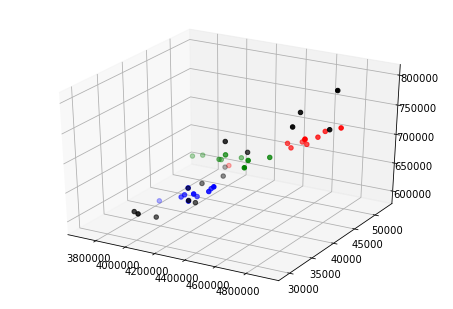

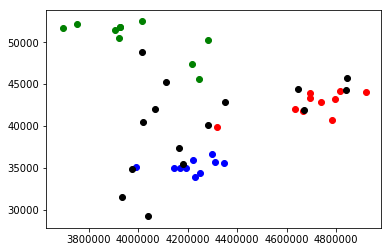

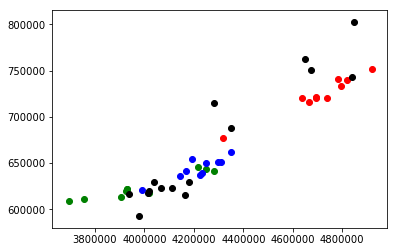

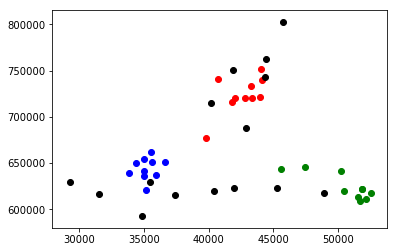

In [66]:
fig = plt.figure()

ax = Axes3D(fig)
ax.scatter( SDat_t[0], SDat_t[1], SDat_t[2], color="r" )
ax.scatter( TDat_t[0], TDat_t[1], TDat_t[2], color="g" )
ax.scatter( VDat_t[0], VDat_t[1], VDat_t[2], color="b" )
ax.scatter( TestDat_t[0], TestDat_t[1], TestDat_t[2], color="black")

plt.show()

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter( SDat_t[0], SDat_t[1], color="r" )
ax.scatter( TDat_t[0], TDat_t[1], color="g" )
ax.scatter( VDat_t[0], VDat_t[1], color="b" )
ax.scatter( TestDat_t[0], TestDat_t[1], color="black")

plt.show()

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter( SDat_t[0], SDat_t[2], color="r" )
ax.scatter( TDat_t[0], TDat_t[2], color="g" )
ax.scatter( VDat_t[0], VDat_t[2], color="b" )
ax.scatter( TestDat_t[0], TestDat_t[2], color="black")

plt.show()

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter( SDat_t[1], SDat_t[2], color="r" )
ax.scatter( TDat_t[1], TDat_t[2], color="g" )
ax.scatter( VDat_t[1], VDat_t[2], color="b" )
ax.scatter( TestDat_t[1], TestDat_t[2], color="black")

plt.show()


Nearest Neighbour implementation

In [67]:
neighs = KNeighborsClassifier(n_neighbors = 1)

allPoints = np.concatenate((SDat, TDat, VDat))
classes = ['s', 's','s', 's', 's', 's', 's', 's', 's', 's',
            't', 't', 't', 't', 't', 't', 't', 't', 't', 't',
            'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v', 'v']

neighs.fit(allPoints, classes)

print (neighs.predict(TestDat))
print (neighs.predict_proba(TestDat))

['s' 's' 's' 's' 's' 't' 'v' 't' 'v' 't' 'v' 't' 'v' 'v' 't']
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 0.  0.  1.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]]
